In [68]:
import numpy as np
import random
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg

In [69]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_dir = "Food_data"
test_dir = "bread_test"

train_data = train_gen.flow_from_directory(train_dir,class_mode="binary",target_size=(224,224),
                                          batch_size=32,shuffle=True)

test_data = test_gen.flow_from_directory(test_dir,class_mode='binary',target_size=(224,224),
                                        batch_size=32,shuffle=True)

Found 702 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


Number of image is : 13


(-0.5, 223.5, 223.5, -0.5)

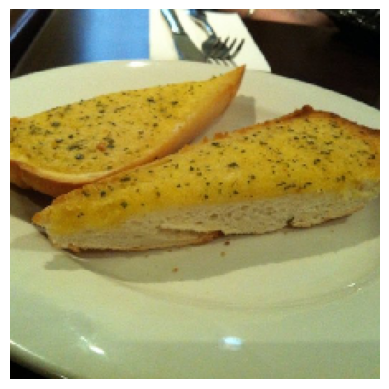

In [70]:
random_image = random.randint(0,32)
image,labels = train_data.next()
plt.imshow(image[random_image])
print(f"Number of image is : {random_image}")
plt.axis(False)

In [71]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',
                     input_shape=(224,224,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(16,3,strides=(1,1),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32,3,strides=(1,1),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
model_data = model.fit(train_data,epochs=30,steps_per_epoch=len(train_data),
                      validation_data=test_data,validation_steps=len(test_data))

Epoch 1/30
22/22 [==============================] - 23s 980ms/step - loss: 0.9611 - accuracy: 0.4744 - val_loss: 0.6072 - val_accuracy: 1.0000
Epoch 2/30
22/22 [==============================] - 21s 933ms/step - loss: 0.6928 - accuracy: 0.5342 - val_loss: 0.7488 - val_accuracy: 0.0000e+00
Epoch 3/30
22/22 [==============================] - 21s 934ms/step - loss: 0.6815 - accuracy: 0.5570 - val_loss: 0.5295 - val_accuracy: 1.0000
Epoch 4/30
22/22 [==============================] - 20s 924ms/step - loss: 0.6540 - accuracy: 0.6168 - val_loss: 0.4971 - val_accuracy: 0.9867
Epoch 5/30
22/22 [==============================] - 20s 919ms/step - loss: 0.5962 - accuracy: 0.6937 - val_loss: 0.8796 - val_accuracy: 0.3867
Epoch 6/30
22/22 [==============================] - 21s 933ms/step - loss: 0.5079 - accuracy: 0.7450 - val_loss: 0.2437 - val_accuracy: 0.9467
Epoch 7/30
22/22 [==============================] - 20s 920ms/step - loss: 0.4312 - accuracy: 0.7934 - val_loss: 0.2099 - val_accuracy: 0.

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 16)      4624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 32)      

In [75]:
path = pathlib.Path("Food_data")
class_name = np.array([item.name for item in path.glob("*")])
print(class_name)

['Bread' 'Egg']


(512, 512, 3)

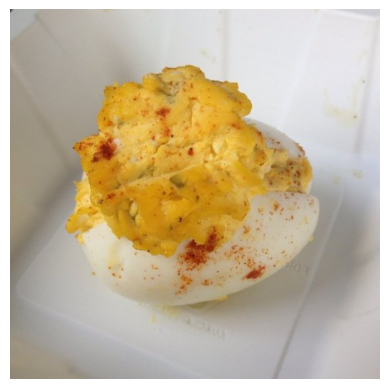

In [76]:
test_img = mpimg.imread("9.jpg")
plt.imshow(test_img)
plt.axis("off")
test_img.shape

In [78]:
# create a function to import and image and resize
def load_pre_img(filename,img_shape=224):
    img = tf.io.read_file(filename)
    de_code = tf.image.decode_image(img)
    resize = tf.image.resize(de_code,size=[img_shape,img_shape])
    rescale = resize/255.
    return rescale

In [165]:
pre_test_data = load_pre_img("egg_3.jpg")
pre_test_data.shape

TensorShape([224, 224, 3])

In [166]:
pred = model.predict(tf.expand_dims(pre_test_data,axis=0))
pred

1/1 [==============================] - 0s 78ms/step


array([[1.]], dtype=float32)

(-0.5, 223.5, 223.5, -0.5)

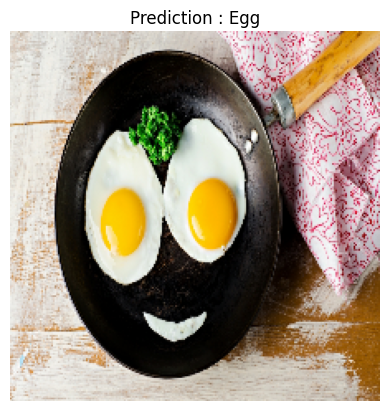

In [167]:
prd_class = class_name[int(tf.round(pred))]
plt.imshow(pre_test_data)
plt.title(f"Prediction : {prd_class}")
plt.axis(False)